## Introduction to the Conjugate Gradient Method Without the Agonizing Pain
*a paper written by Jonathan Richard Shewchuk in 1994*

This Notebook follows the derivation of the CG method as described in the paper mentioned above. It reproduces the figures by a Julia implementation of the provided pseudo-codes.

In [1]:
using CairoMakie
using LinearAlgebra

In [2]:
# initial definitions
A = [3 2; 2 6]
b = [2, -8]

f(x) = 0.5 * x' * A * x - b' * x;


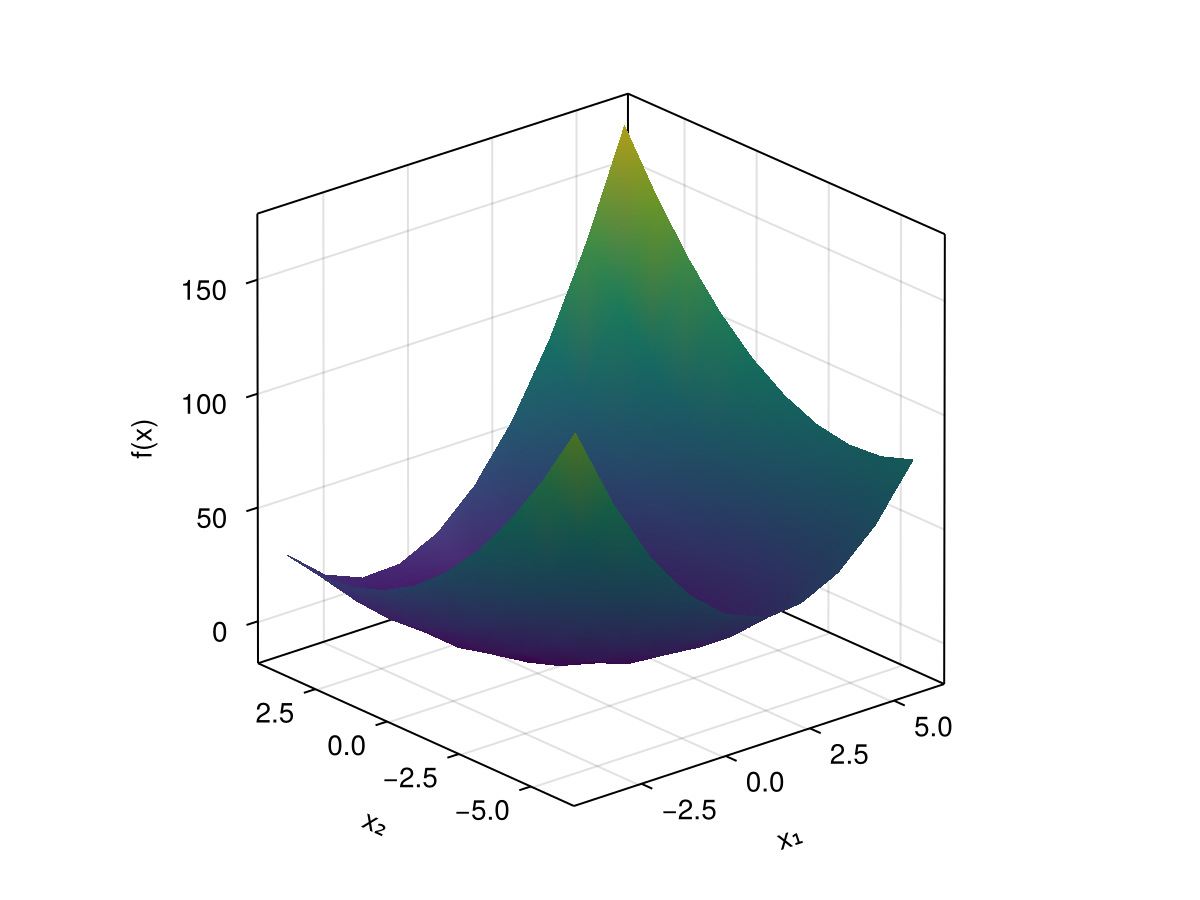

In [3]:
# create a surface plot of the quadratic functional
x1 = LinRange(-4, 6, 10)
x2 = LinRange(-6, 4, 10)

g(a,b) = f([a, b])

z = g.(x1', x2)

fig = Figure()
ax  = Axis3(fig[1, 1], aspect=(1,1,1), xlabel="x₁", ylabel="x₂", zlabel="f(x)")
surface!(ax, x1, x2, z)
fig


### Method of Steepest Descent

Follow the maximal gradient of f downward until it is (almost) zero

* the negative gradient is the residual `b - Ax`
* the optimal step size `alpha` can be found by realising that the optimum is reached in the current direction at the point where the gradient is orthogonal to it.

In [4]:
# Algorithm for steepest descent 

function steepest_descent_step(x)
    # compute residual (<=> negative gradient)
    r = b - A*x
    # find optimal step size
    α = (r' * r) / (r' * A * r)
    # update position
    return x + α * r
end

steepest_descent_step (generic function with 1 method)

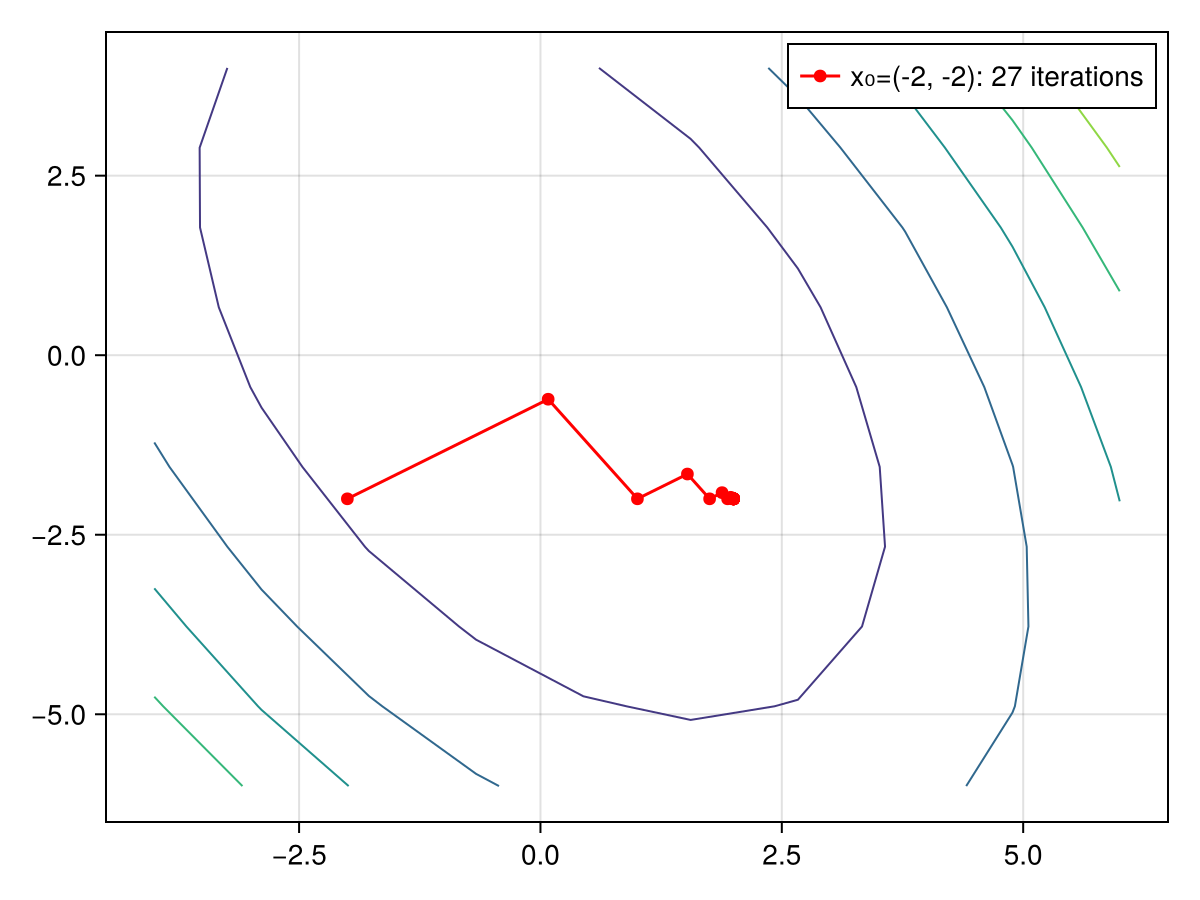

In [5]:
# plot steepest descent
fig = Figure()
ax = Axis(fig[1, 1])
contour!(ax, x1, x2, z)
# initial guess 
x = [-2., -2.]
x_ones = [x[1]]
x_twos = [x[2]]

niter = 0
while !all(x .≈ [2, -2])
    x = steepest_descent_step(x)

    push!(x_ones, x[1])
    push!(x_twos, x[2])
    niter += 1
end



scatterlines!(ax, x_ones, x_twos, color=:red, label="x₀=(-2, -2): $niter iterations")
axislegend(ax)
fig

### Method of Conjugate Directions

We chose a `A-orthogonal` basis of our search space and eliminate the error component-wise.

A choice for this basis can be found using the `Conjugate Gram-Schmidt process`

In [6]:
function conjugate_direction_step(x, d)
    # compute residual
    r = b - A*x
    # find step size for direction d
    α = (d' * r) / (d' * A * d)
    # update position
    x += α * d
    return x
end

conjugate_direction_step (generic function with 1 method)

In [7]:
function gram_schmidt_basis(ndim)
    # start with cartesian basis vectors
    u0 = zeros(ndim)
    u0[1] = 1
    ds = [u0]
    for i = 2:ndim
        u = zeros(ndim)
        u[i] = 1
        d = u
        for j = 1:i-1
            dj = ds[j]
            d -= (u' * A * dj) / (dj' * A * dj) * dj
        end
        push!(ds, d)
    end
    return ds
end

gram_schmidt_basis (generic function with 1 method)

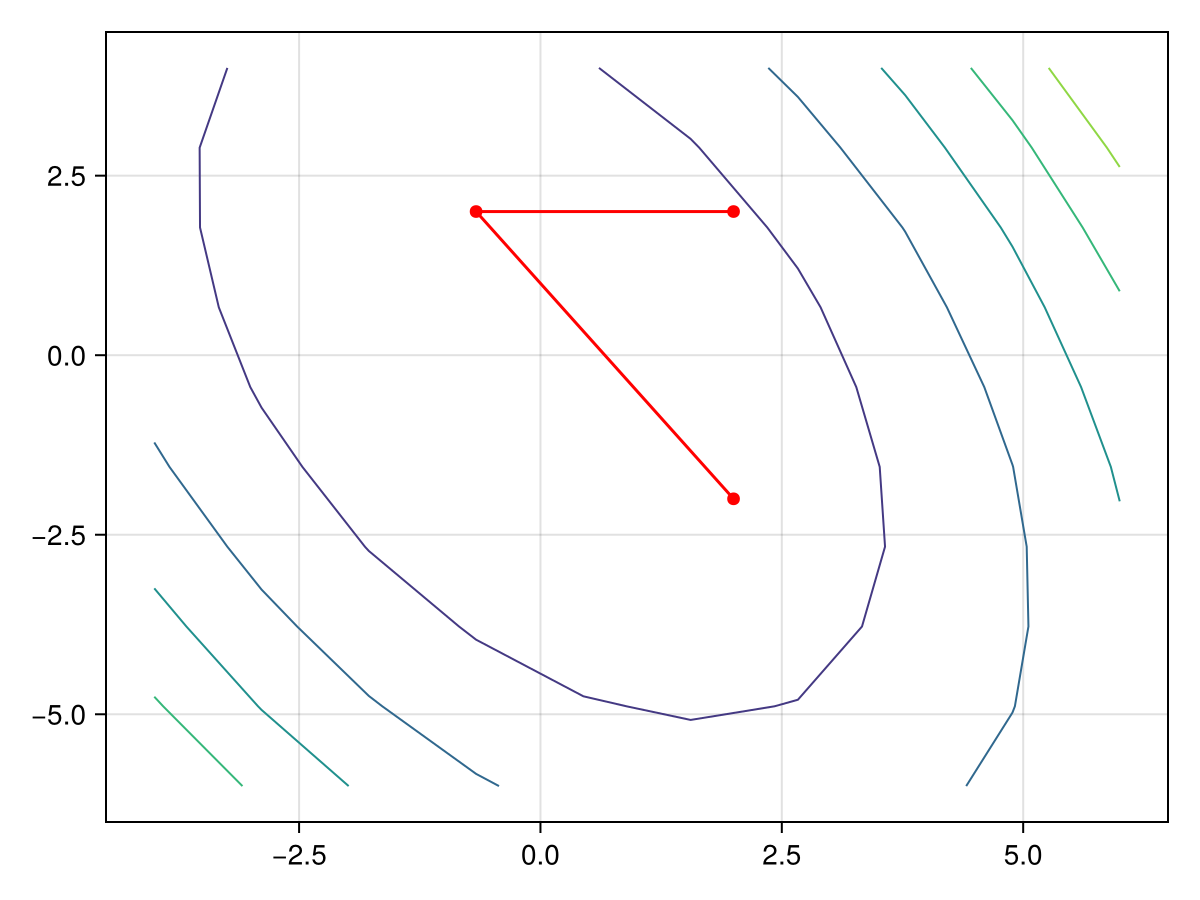

In [8]:
# plot conjugate directions
fig = Figure()
ax = Axis(fig[1, 1])
contour!(ax, x1, x2, z)

# initial guess 
x = [2., 2.]
x_ones = [x[1]]
x_twos = [x[2]]

# obtain basis
ds = gram_schmidt_basis(length(x))

niter = 0
for d = ds
    x = conjugate_direction_step(x, d)

    push!(x_ones, x[1])
    push!(x_twos, x[2])
    niter += 1
end



scatterlines!(ax, x_ones, x_twos, color=:red)
fig

### Method of Conjugate Gradients

Apply the conjugate direction's approach using the residuals (i.e. the gradient) as basis.

In [9]:
function conjugate_gradient(x)
    r  = b - A*x
    d  = r
    xs = [x]
    for i = 1:length(b)
        r0 = r
        α = (r' * r) / (d' * A * d)
        r -= α * A * d
        x += α * d

        β  = (r' * r) / (r0' * r0)
        d  = r + β * d

        push!(xs, x)
    end
    return xs
end

conjugate_gradient (generic function with 1 method)

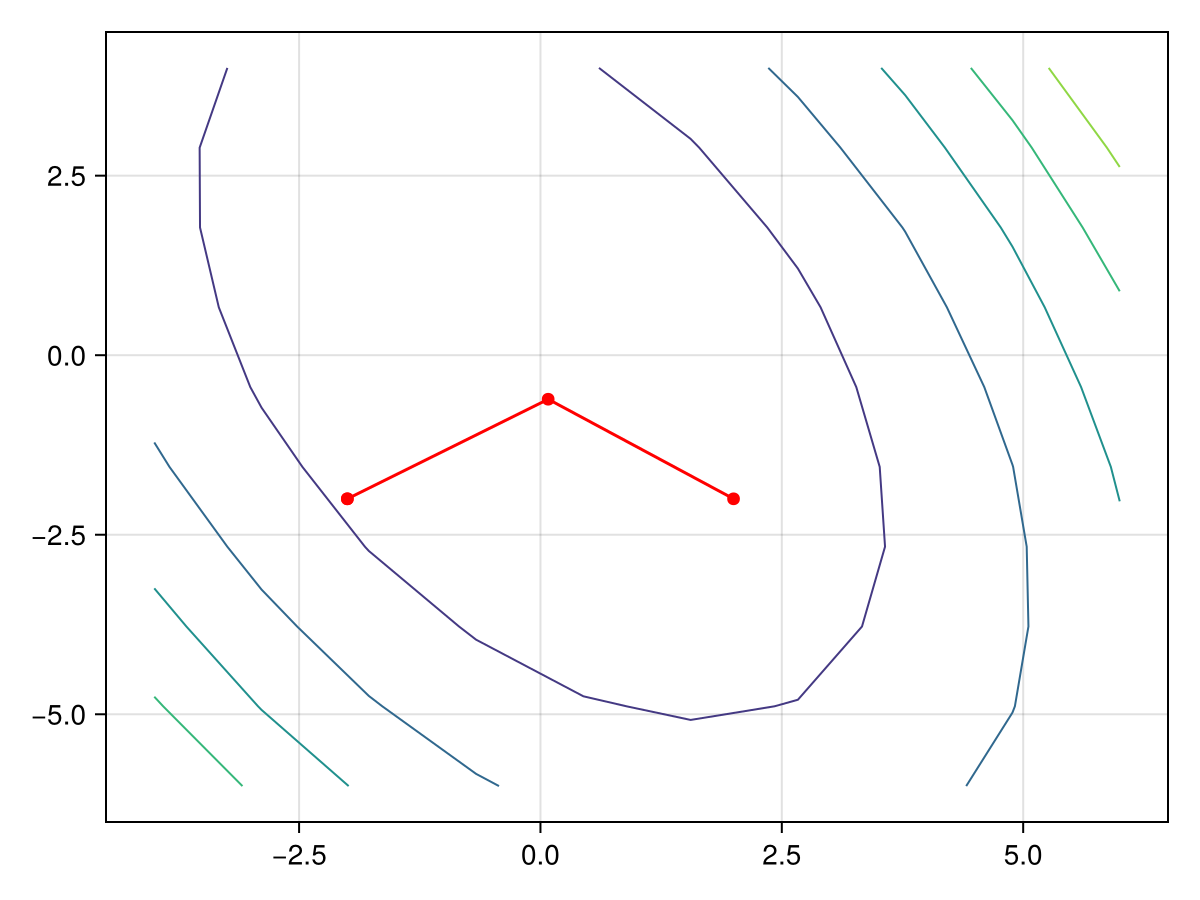

In [10]:
# plot conjugate gradient path
fig = Figure()
ax = Axis(fig[1, 1])
contour!(ax, x1, x2, z)

# initial guess 
x = [-2., -2.]
x_ones = [x[1]]
x_twos = [x[2]]

xs = conjugate_gradient(x)

for x = xs
    push!(x_ones, x[1])
    push!(x_twos, x[2])
end



scatterlines!(ax, x_ones, x_twos, color=:red)
fig